## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)


`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [4]:
df=pd.read_csv('ab_data.csv')
df.head(5)


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [5]:
df.shape[0]


294478

c. The number of unique users in the dataset.

In [6]:
df.user_id.nunique()


290584

d. The proportion of users converted.

In [7]:
df.converted

0         0
1         0
2         0
3         0
4         1
5         0
6         1
7         0
8         1
9         1
10        0
11        0
12        0
13        0
14        0
15        1
16        0
17        1
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        1
27        0
28        1
29        0
         ..
294448    0
294449    0
294450    0
294451    0
294452    0
294453    0
294454    0
294455    0
294456    0
294457    0
294458    0
294459    0
294460    0
294461    0
294462    0
294463    0
294464    0
294465    0
294466    0
294467    0
294468    0
294469    0
294470    0
294471    0
294472    0
294473    0
294474    0
294475    0
294476    0
294477    0
Name: converted, Length: 294478, dtype: int64

e. The number of times the `new_page` and `treatment` don't match.

In [8]:
df.groupby(['group','landing_page']).count()


user_id  timestamp  converted
group     landing_page                               
control   new_page         1928       1928       1928
          old_page       145274     145274     145274
treatment new_page       145311     145311     145311
          old_page         1965       1965       1965

f. Do any of the rows have missing values?

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
df2=df.drop(df[(df['group']=='control') & (df['landing_page']=='new_page')].index )
df2=df2.drop(df[(df['group']=='treatment') & (df['landing_page']=='old_page')].index)
df2.groupby(['group','landing_page']).count()


,,user_id,timestamp,converted
group,landing_page,,,
control,old_page,145274,145274,145274
treatment,new_page,145311,145311,145311


In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
df2.user_id.nunique()


290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
df2.user_id.value_counts().reset_index()


,index,user_id
0,773192,2
1,630732,1
2,811737,1
3,797392,1
4,795345,1
5,801490,1
6,799443,1
7,787157,1
8,793302,1
9,817882,1


c. What is the row information for the repeat **user_id**? 

In [14]:
df2['user_id']


0         851104
1         804228
2         661590
3         853541
4         864975
5         936923
6         679687
7         719014
8         817355
9         839785
10        929503
11        834487
12        803683
13        944475
14        718956
15        644214
16        847721
17        888545
18        650559
19        935734
20        740805
21        759875
23        793849
24        905617
25        746742
26        892356
27        773302
28        913579
29        736159
30        690284
           ...  
294448    776137
294449    883344
294450    825594
294451    875688
294452    927527
294453    789177
294454    937338
294455    733101
294456    679096
294457    691699
294458    807595
294459    924816
294460    846225
294461    740310
294462    677163
294463    832080
294464    834362
294465    925675
294466    923948
294467    857744
294468    643562
294469    755438
294470    908354
294471    718310
294472    822004
294473    751197
294474    945152
294475    7346

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
df2.drop_duplicates(subset='user_id', inplace=True)


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
df2.converted.mean ()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
control=df2[df2['group']=='control'].converted.mean()
control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
treatment=df2[df2['group']=='treatment'].converted.mean()
treatment

0.11880806551510564

d. What is the probability that an individual received the new page?

In [19]:
pages=df2.landing_page.value_counts().reset_index()
pages[pages['index']=='new_page'].landing_page.sum()/pages.landing_page.sum()

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Your answer goes here.**

- Since an individual's propensity to recall the new page is about 0.5, it makes it a fair control and treatment group landing page check.

- For the calculated conversion rate for the control and treatment groups, however, the conversion rate is observed to be slightly lower when new pages are used by the treatment group than when old pages are used by the control group.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

- $H_0$ is $P_{new} - P_{old}$ <= 0


- $H_1$ is $P_{new} - P_{old}$ > 0





`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [20]:
p_new=df2.converted.mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [21]:
p_old=df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [22]:
n_new=df2[df2['landing_page']=='new_page'].converted.count()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [23]:
n_old=df2[df2['landing_page']=='old_page'].converted.count()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
new_page_converted=np.random.choice([1,0],n_new,p=[p_new,1-p_new])
new_page_converted

array([1, 0, 0, ..., 0, 1, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
old_page_converted=np.random.choice([1,0],n_old,p=[p_old,1-p_old])
old_page_converted

array([0, 1, 1, ..., 0, 1, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
new_page_converted.mean()-old_page_converted.mean()

0.00095434762335160073

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [27]:
p_diffs=[]
for _ in range (10000):
    new_page_converted=np.random.choice([1,0],n_new,p=[p_new,1-p_new])
    old_page_converted=np.random.choice([1,0],n_old,p=[p_old,1-p_old])
    diff=new_page_converted.mean()-old_page_converted.mean()
    p_diffs.append(diff)
p_diffs=np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

am  95% sure that the different of conversion rate between new and old pages is between -0.0023558689090736958,0.0024342582518590656 min-max values 


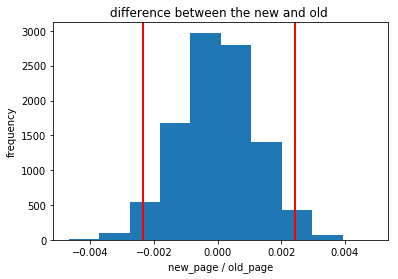

In [28]:
low=np.percentile(p_diffs,2.5)
high=np.percentile(p_diffs,97.5)
plt.hist(p_diffs);
plt.axvline(x=low,color='r',linewidth=2);
plt.axvline(x=high,color='r',linewidth=2);
plt.title('difference between the new and old ')
plt.xlabel('new_page / old_page')
plt.ylabel('frequency')
print('am  95% sure that the different of conversion rate between new and old pages is between {},{} min-max values '.format(low,high))

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

0.90810000000000002

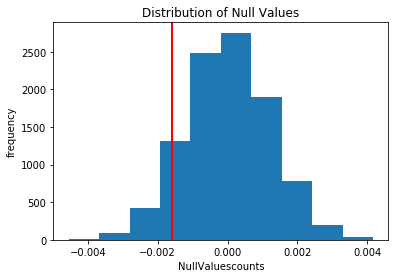

In [35]:
null_vals=np.random.normal(0,p_diffs.std(),p_diffs.size)
actual_diff=treatment-control
plt.hist(null_vals);
plt.axvline(x=actual_diff,color='r',linewidth=2);
plt.title('Distribution of Null Values')
plt.xlabel('NullValuescounts')
plt.ylabel('frequency')
(null_vals>actual_diff).mean()

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

- This value calculates the proportion of null values that, based on the alternative, are considered extreme.
The high page value (greater than error threshold 1 {0.05}) implies that the null hypothesis is not rejected.
The low Page value (less than the error threshold 1 {0.05}) means that the null can be rejected in favor of the alternative hypothesis.
The high page value (0.908) appeared in the mean calculations;
We do not move away from the null hypothesis, and we do not reject the null hypothesis that the old page is better or better than the new page. And decide that there is no need or benefit to use the new page and to maintain the landing page according to the old page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
import statsmodels.api as sm

convert_old =df2[df2['landing_page']=='new_page'].converted.sum()
convert_new = df2[df2['landing_page']=='new_page'].converted.sum()
n_old = df2[df2['landing_page']=='old_page'].converted.count()
n_new = df2[df2['landing_page']=='new_page'].converted.count()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [31]:
zstat, p_val =sm.stats.proportions_ztest([convert_old,convert_new],[n_old,n_new],alternative='two-sided')
print('p_val for the z-test = {0:0.3f} which is greater than 0.05 (alpha value)'.format(p_val))

p_val for the z-test = 0.980 which is greater than 0.05 (alpha value)


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

- For two alternatives, the above calculated Z-Score and P value:

Alternative='two-sided ': which implies that the diverted proprietary new page is not equal to the diverted proportion of the old page.

Alternative= 'smaller': which implies that the diverted proprtion of the new page is higher than the diverted proportion of the old page.

We have a P value greater than 0.05 from both calculations, so we fail to reject the null hypothesis in both cases and be more sure that the old page diverted proportion is equal (as per first 'two-sided' alternative) or greater than the new page diverted proportion (as per second 'smaller' alternative). Agreeing with the previous conclusion in parts j. and k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

### Regression of Logistics

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [37]:
df2['ab_page']=pd.get_dummies(df2.landing_page).new_page
df2['intercept']=1
df2.head(10)

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,0,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [39]:
import statsmodels.api as sm

lr=sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results=lr.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [40]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:               8.077e-06
Time:                        18:30:18   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

- The P value associated with ab page is 0.19, which is greater than 0.05 percent of the error threshold, meaning that we still fail to reject the null, which is the same conversion rate for the new and old page in this case.

The value of P here is different from the value of P in Part 2 as:¶¶
The null and alternative hypotheses linked to this model of regression are
The $H 0$ null hypothesis is $P {new} = P {old}$
The $H 1$ alternative is $P {new} > P {old}$ > 0
In Part II, the null and alternative hypotheses are The $H 0$ null hypothesis is $P {new} - P {old}$ <= 0$
The $H 1$ alternative is $P {new} - P {old}$ > 0

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

- It is always easier to gather more variables that can impact the conversion rate, not just the new and old page to be more secure in making proper decisions that will target people's popularity and changes that will target people based on their culture, their lifestyles, their average income and all other variables that can be considered and measured.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [45]:
countries = pd.read_csv('./countries.csv')
countries.head(10)

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK
5,909908,UK
6,811617,US
7,938122,US
8,887018,US
9,820683,US


In [44]:
df3 = countries.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df3[['CA','UK','US']]=pd.get_dummies(df3.country)
df3.head(10)

,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0
909908,UK,2017-01-06 20:44:26.334764,treatment,new_page,0,1,1,0,1,0
811617,US,2017-01-02 18:42:11.851370,treatment,new_page,1,1,1,0,0,1
938122,US,2017-01-10 09:32:08.222716,treatment,new_page,1,1,1,0,0,1
887018,US,2017-01-06 11:09:40.487196,treatment,new_page,0,1,1,0,0,1


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [46]:
lr2=sm.Logit(df3['converted'],df3[['intercept','ab_page','CA','UK']])
results2=lr2.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:               2.323e-05
Time:                        18:31:18   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

## Findings
Refer to Statistical Importance:

- Using various ways to view the results, all evidence from the above calculations confirm that there is no need to move to the new page as over all the sample size, we have no evidence to refute the null hypothesis and become more and more confident that the old page is better or at least as good as the new page according to diverted proportion.

- Refer to Practical Importance:
The change in the diverted rate is 1.04 times what it was before making some change at the most positive diverted rate. So, for designing the new page, we will lose time and money and get marginally positive improvement in diverted rate or even get the worst negative chabge. Often, if the new page is used, the old users of the page will need time to get used to the new page design, which also negatively impacts the diverted rate.


In [133]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0